# Getting Data from DB

In [3]:
#importing Teh necessary Library

import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc as py
from collections import Counter

In [4]:
#connecting to the DB

connn=py.connect(r'DRIVER={SQL Server};SERVER=DESKTOP-312N3KJ\YEKINI;DATABASE=AdventureWorks2014;Trusted_Connection=yes;')

In [5]:
#The cursor connect

cursor=connn.cursor()

In [7]:
#getting the data from Table

data_1=pd.read_sql_query('Select * from HumanResources.EmployeeDepartmentHistory',connn)

C:\Users\HP\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [8]:
#creating a dataframe for the raw data

df=pd.DataFrame(data)

In [9]:
#imported Other Data

df_1=pd.DataFrame(data_1)

In [10]:
#The A Data

df.head()

,DepartmentID,Name,GroupName,ModifiedDate
0,1,Engineering,Research and Development,2008-04-30
1,2,Tool Design,Research and Development,2008-04-30
2,3,Sales,Sales and Marketing,2008-04-30
3,4,Marketing,Sales and Marketing,2008-04-30
4,5,Purchasing,Inventory Management,2008-04-30


In [11]:
#the B data

df_1.head()

,BusinessEntityID,DepartmentID,ShiftID,StartDate,EndDate,ModifiedDate
0,1,16,1,2009-01-14,None,2009-01-13
1,2,1,1,2008-01-31,None,2008-01-30
2,3,1,1,2007-11-11,None,2007-11-10
3,4,1,1,2007-12-05,2010-05-30,2010-05-28
4,4,2,1,2010-05-31,None,2010-05-30


In [12]:
# we merge The two Table together.

ddf=df.merge(df_1,on='DepartmentID')

In [13]:
ddf.head()

,DepartmentID,Name,GroupName,ModifiedDate_x,BusinessEntityID,ShiftID,StartDate,EndDate,ModifiedDate_y
0,1,Engineering,Research and Development,2008-04-30,2,1,2008-01-31,None,2008-01-30
1,1,Engineering,Research and Development,2008-04-30,3,1,2007-11-11,None,2007-11-10
2,1,Engineering,Research and Development,2008-04-30,4,1,2007-12-05,2010-05-30,2010-05-28
3,1,Engineering,Research and Development,2008-04-30,5,1,2008-01-06,None,2008-01-05
4,1,Engineering,Research and Development,2008-04-30,6,1,2008-01-24,None,2008-01-23


In [14]:
#Missing Data ✔

ddf.isnull().sum()

DepartmentID          0
Name                  0
GroupName             0
ModifiedDate_x        0
BusinessEntityID      0
ShiftID               0
StartDate             0
EndDate             290
ModifiedDate_y        0
dtype: int64

In [15]:
#the shape of the Data

ddf.shape

(296, 9)

In [16]:
#Drop the Missing Data

ddf=ddf.drop('EndDate',axis=1)

In [17]:
#We rename the Missing Data

ddf['ENdDate']=ddf.rename(columns={'ModifiedDate_y':'EndDate'},inplace=True)

In [18]:
ddf.head()

,DepartmentID,Name,GroupName,ModifiedDate_x,BusinessEntityID,ShiftID,StartDate,EndDate,ENdDate
0,1,Engineering,Research and Development,2008-04-30,2,1,2008-01-31,2008-01-30,None
1,1,Engineering,Research and Development,2008-04-30,3,1,2007-11-11,2007-11-10,None
2,1,Engineering,Research and Development,2008-04-30,4,1,2007-12-05,2010-05-28,None
3,1,Engineering,Research and Development,2008-04-30,5,1,2008-01-06,2008-01-05,None
4,1,Engineering,Research and Development,2008-04-30,6,1,2008-01-24,2008-01-23,None


In [19]:
ddf=ddf.drop(['EndDate','ENdDate'],axis=1)

In [20]:
ddf.head()

,DepartmentID,Name,GroupName,ModifiedDate_x,BusinessEntityID,ShiftID,StartDate
0,1,Engineering,Research and Development,2008-04-30,2,1,2008-01-31
1,1,Engineering,Research and Development,2008-04-30,3,1,2007-11-11
2,1,Engineering,Research and Development,2008-04-30,4,1,2007-12-05
3,1,Engineering,Research and Development,2008-04-30,5,1,2008-01-06
4,1,Engineering,Research and Development,2008-04-30,6,1,2008-01-24


In [21]:
#we copy the data

ndf=ddf.copy()

In [22]:
#Data info

ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 295
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DepartmentID      296 non-null    int64         
 1   Name              296 non-null    object        
 2   GroupName         296 non-null    object        
 3   ModifiedDate_x    296 non-null    datetime64[ns]
 4   BusinessEntityID  296 non-null    int64         
 5   ShiftID           296 non-null    int64         
 6   StartDate         296 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 18.5+ KB


In [23]:
ndf.head()

,DepartmentID,Name,GroupName,ModifiedDate_x,BusinessEntityID,ShiftID,StartDate
0,1,Engineering,Research and Development,2008-04-30,2,1,2008-01-31
1,1,Engineering,Research and Development,2008-04-30,3,1,2007-11-11
2,1,Engineering,Research and Development,2008-04-30,4,1,2007-12-05
3,1,Engineering,Research and Development,2008-04-30,5,1,2008-01-06
4,1,Engineering,Research and Development,2008-04-30,6,1,2008-01-24


In [24]:
ndf['EndDate']=pd.to_datetime(ndf['ModifiedDate_x'])
ndf['StartDate']=pd.to_datetime(ndf['StartDate'])

In [25]:
ndf.head()

,DepartmentID,Name,GroupName,ModifiedDate_x,BusinessEntityID,ShiftID,StartDate,EndDate
0,1,Engineering,Research and Development,2008-04-30,2,1,2008-01-31,2008-04-30
1,1,Engineering,Research and Development,2008-04-30,3,1,2007-11-11,2008-04-30
2,1,Engineering,Research and Development,2008-04-30,4,1,2007-12-05,2008-04-30
3,1,Engineering,Research and Development,2008-04-30,5,1,2008-01-06,2008-04-30
4,1,Engineering,Research and Development,2008-04-30,6,1,2008-01-24,2008-04-30


In [26]:
ndf=ndf.drop('ModifiedDate_x',axis=1)

In [27]:
ndf.head()

,DepartmentID,Name,GroupName,BusinessEntityID,ShiftID,StartDate,EndDate
0,1,Engineering,Research and Development,2,1,2008-01-31,2008-04-30
1,1,Engineering,Research and Development,3,1,2007-11-11,2008-04-30
2,1,Engineering,Research and Development,4,1,2007-12-05,2008-04-30
3,1,Engineering,Research and Development,5,1,2008-01-06,2008-04-30
4,1,Engineering,Research and Development,6,1,2008-01-24,2008-04-30


In [28]:
for i in ndf.columns:
    print('The Uniqueness Of the Values In Our dataset {}: {}'.format(i,ndf[i].nunique()))

The Uniqueness Of the Values In Our dataset DepartmentID: 16
The Uniqueness Of the Values In Our dataset Name: 16
The Uniqueness Of the Values In Our dataset GroupName: 6
The Uniqueness Of the Values In Our dataset BusinessEntityID: 290
The Uniqueness Of the Values In Our dataset ShiftID: 3
The Uniqueness Of the Values In Our dataset StartDate: 170
The Uniqueness Of the Values In Our dataset EndDate: 1


Text(0.0, 1.0, 'Names')

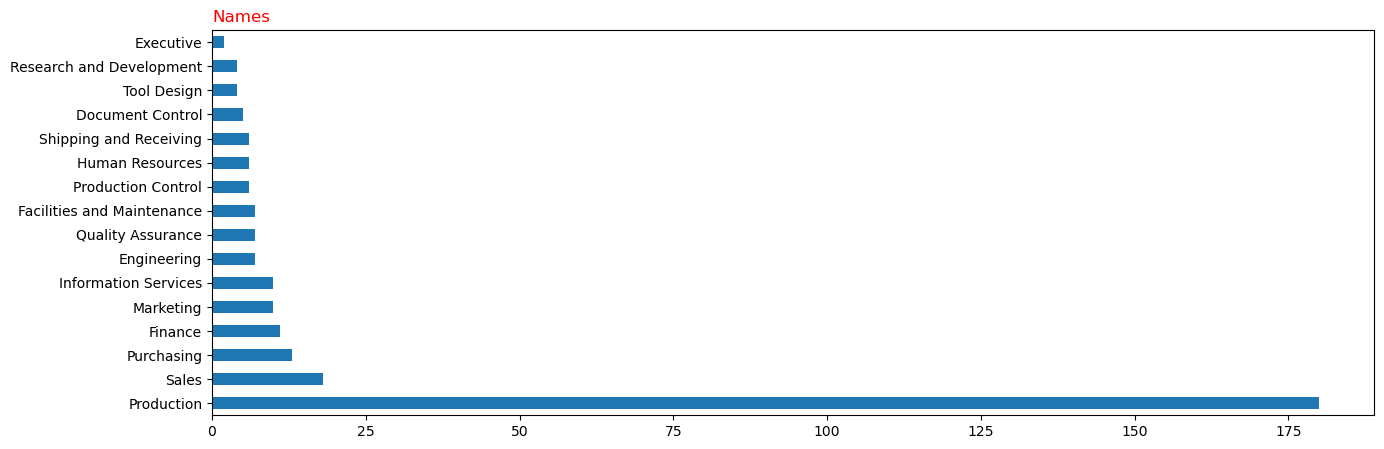

In [29]:
from matplotlib import pyplot as plt

ndf['Name'].value_counts().plot.barh(figsize=(15,5))
plt.title('Names',loc='left',c='r')

Text(0.0, 1.0, 'GroupName')

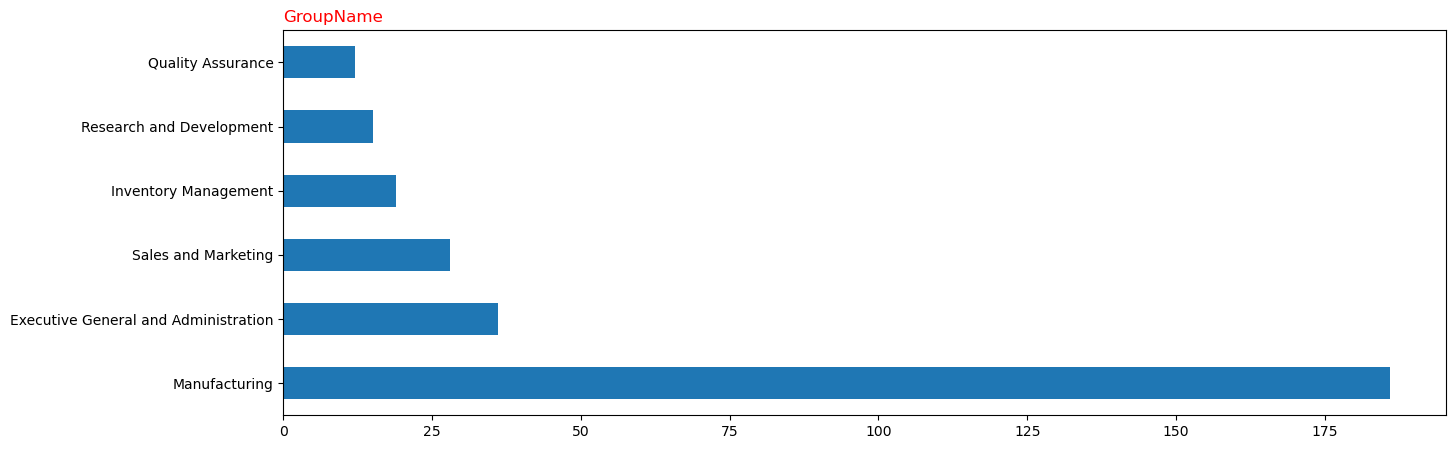

In [30]:
ndf['GroupName'].value_counts().plot.barh(figsize=(15,5))
plt.title('GroupName',c='r',loc='left')

In [31]:
ndf['Year']=pd.DatetimeIndex(ndf['StartDate']).year

Text(0.5, 0, 'Years')

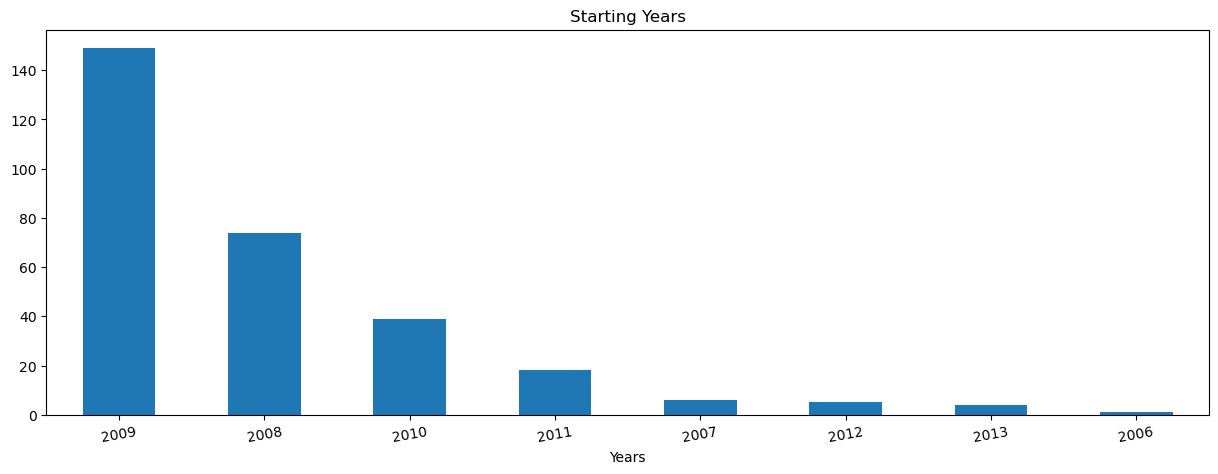

In [32]:
ndf['Year'].value_counts().plot.bar(figsize=(15,5))
plt.title("Starting Years")
plt.xticks(rotation=10);
plt.xlabel('Years')

Analysis from the Adventureworks2014 